# Functions and Generators
## Function Basics

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
os.getcwd()
os.chdir('/Users/fizz/Document/Notes/Python/codes')

In [ ]:
func.attr = value     # Attach attributes

##  Scopes

Name Resolution: The LEGB Rule

1. Name *assignments* create or change local names by default.

2. Name *references* search at most four scopes: local, then enclosing functions (if any), then global, then built-in.

3. Names declared in **global** and **nonlocal** statements map assigned names to enclosing module and function scopes, respectively.

In [3]:
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [24]:
t='''var = 99
def local():
    var = 0
def glob1():
    global var
    var += 1
def glob2():
    var = 0
    import thismod
    thismod.var += 1
def glob3():
    var = 0
    import sys
    glob = sys.modules['thismod']
    glob.var += 1
def test():
    print(var)
    local(); glob1(); glob2(); glob3()
    print(var)'''
f = open('thismod.py', 'w')
f.write(t)
f.close()
import thismod
thismod.test()
thismod.var

99
102


102

In [25]:
# Factory Functions: Closures
def maker(N):
    def action(X):
        return X ** N
    return action
f = maker(2)
f(3)

9

Perhaps the most unusual part of this, though, is that the nested function remembers integer 2, the value of the variable **N** in **marker**, even though **maker** has returned and exited by the time we call **action**. In effect, **N** from the enclosing local scope is retained as state information attached to the generated **action**, which is why we get back its argument squared when it it later called.

In [26]:
def f1():
    x = 88
    f2(x)      # Forward reference OK
    
def f2(x):
    print(x)
# Code inside a def is never evaluated until the function is actually called
f1()

88


Loop variables may require defaults, not scopes

If a **lambda** or **def** defined within a function is nested inside a loop, and the nested function referenes an enclosing scope variable that is changed by that loop, all functions generated with the loop will have the same value - the value the referenced variable has the last loop iteration. In such cases, you must still use defaults to save the variable's *current* value instead.

In [27]:
# Here's an illustration of this phenomenon reduced to simple code
def makeActions():
    acts = []
    for i in range(5):                           # Tries to remember each i
        acts.append(lambda x: i ** x)    # But all remember same last i
    return acts
acts = makeActions()
acts[0](2), acts[1](2), acts[2](2)

(16, 16, 16)

In [28]:
# Use defaults to save the variable's current value
def makeActions():
    acts = []
    for i in range(5):
        acts.append(lambda x, i=i: i ** x)
    return acts
acts = makeActions()
acts[0](2), acts[1](2), acts[2](2)

(0, 1, 4)

Besides allowing names in enclosing **def**s to be changed, the **nonlocal** statement also forces the issue for references - much like the **global** statement, **nonlocal** causes searches for the names listed in the statement to begin in the enclosing **def**'s scopes, not in the local scope of the declaring function. That is, **nonlocal** also means "skip my local scope entirely."

1. **global** makes scope lookup in the enclosing module's scope and allows names there to be assigned. Scope lookup continues on to the built-in scope if the name does not exist in the module, but assignments to global names always create or change them in the module's scope.

2. **nonlocal** restricts scope lookup to just enclosing **def**s, requires that the names already exist there, and allows them to be assigned. Scope lookup does not continue on to the global or built-in scopes.

In [37]:
def tester(start):
    state = start
    def nested(label):
        nonlocal state         # Allowed to change it if nonlocal
        print(label, state)
        state += 1
    return nested
F = tester(0)
F('spam')
F('ham')

G = tester(42)
G('kkp')

spam 0
ham 1
kkp 42


In [39]:
# State with Function Attributes
def tester(start):
    def nested(label):
        print(label, nested.state)
        nested.state += 1
    nested.state = start
    return nested
F = tester(0)
F('spam')
F('ham')
F.state

G = tester(42)
G('kkp')
G.state

spam 0
ham 1


2

kkp 42


43

In [26]:
# Customizing open
t='''import builtins
def makeopen(id):
    original = builtins.open
    def custom(*kargs, **pargs):
        print('Custom open call %r' % id, kargs, pargs)
        return original(*kargs, **pargs)
    builtins.open = custom'''
f = open('makeopen.py', 'w')
f.write(t)
f.close()

219

In [2]:
F = open('script2.py')
F.read()

from makeopen import makeopen
makeopen('spam')
F = open('script2.py')
F.read()

'import sys\nprint(sys.path)\nx = 2\nprint(x ** 32)\n'

Custom open call 'spam' ('script2.py',) {}


'import sys\nprint(sys.path)\nx = 2\nprint(x ** 32)\n'

## Arguments

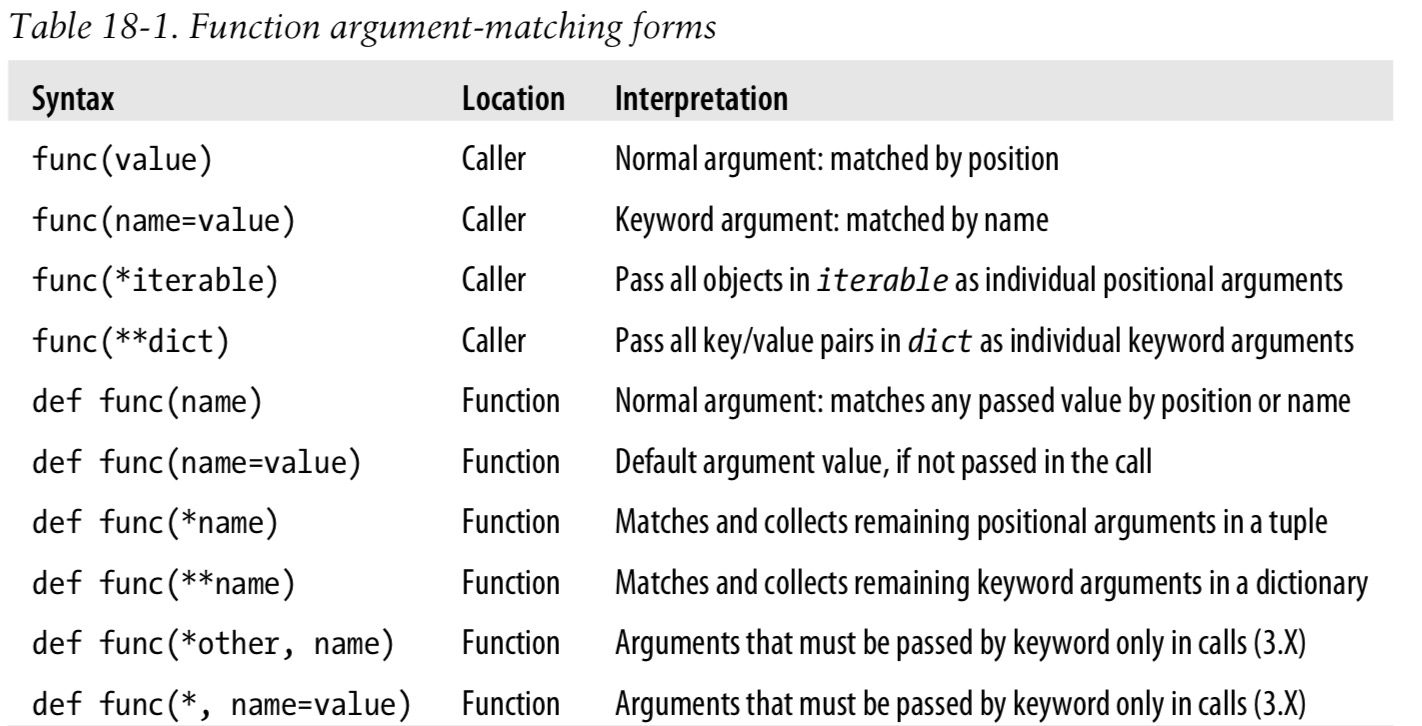

In [2]:
from IPython.display import Image
Image(filename='arguments.jpg')

If you choose to use and combine the special argument-matching modes, Python will ask you to follow these ordering rules among the modes' optional components:

1. In a function **call**, arguments must appear in this order: any positional arguments (**value**); followed by a combination of any keyword arguments (**name=value**) and the ***iterable** form; followed by the ****dict** form.

2. In a function **header**, arguments must appear in this order: any normal arguments (**name**); followed by any default arguments (**name=value**); followed by the ***name** (or **\*** in 3.X) form; followed by any **name** or **name=value** keyword-only arguments (in 3.X); followed by the ****name** form.

The steps that Python internally carries out to match arguments before assignment can roughly be described as follows:

1. Assign nonkeyword arguments by position

2. Assign keyword arguments by matching names

3. Assign extra nonkeyword arguments to ***name** tuple

4. Assign extra keyword arguments to ****name** dictionary

5. Assign default values to unassigned arguments in header

*Beware mutable defaults*: As footnoted in the prior chapter, if you code a default to be a mutable object (e.g., **def f(a=[])**), the same, *single* mutable object is reused every time the function is later called - even if it is changed in place within the function. The net effect is that the argument's default retains its value from the prior call, and is not reset to its original value coded in the **def** header.

In [4]:
def f(a=[]):
    a.append('kkp')
    return a
f()
f()
f()

['kkp']

['kkp', 'kkp']

['kkp', 'kkp', 'kkp']

In [2]:
# Headers: Collecting arguments
def f(a, *pargs, **kargs): print(a, pargs, kargs)
f(1, 2, 3, x=1, y=2)

# Calls: Unpacking arguments
def func(a, b, c, d): print(a, b, c, d)
args = (1, 2)
args += (3, 4)
func(*args)      # Same as func(1, 2, 3, 4)

args = {'a':1, 'b':2, 'c':3}
args['d'] = 4
func(**args)    # Same as func(a=1, b=2, c=3, d=4)

1 (2, 3) {'x': 1, 'y': 2}
1 2 3 4
1 2 3 4


In [6]:
# we can combine normal, position, and keyword arguments in the call
func(*(1, 2), **{'d':4, 'c':3})
func(1, *(2, 3), **{'d':4})
func(1, c=3, *(2,), **{'d':4})
func(1, *(2, 3), d=4)
func(1, *(2,), c=3, **{'d':4})

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4


The ***pargs** form in a call is an *iteration context*, so technically it accepts any iterable object, not just tuples or other sequences as shown in the examples here. For instance, a file object works after the \*, and unpacks its lines into individual arguments (e.g., **func(*open('fname')**).

This generality is supported in both Python 3.X and 2.X, but it holds true only for calls - a ***pargs** in a call allows any iterable, but the same form in a **def** header always bundles extra arguments into a tuple.

In [11]:
def tracer(func, *pargs, **kargs):     # collect
    print('calling:', func.__name__)
    return func(*pargs, **kargs)        # unpack
def func(a, b, c, d):
    return a + b + c + d
print(tracer(func, 1, 2, c=3, d=4))

calling: func
10


In [15]:
def kwonly(a, *b, c):
    print(a, b, c)
kwonly(1, 2, c=3)

#  We can also use a * character by itself in the arguments list to indicate that a function does
# not accept a variable-length argument list but still expects all arguments following the * to
# be passed as keywords.
def kwonly(a, *, b, c):
    print(a, b, c)
kwonly(1, c=3, b=2)

def kwonly(a, *, b=1, c, d=2):
    print(a, b, c, d)
kwonly(3, c=4)

1 (2,) 3
1 2 3
3 1 4 2


In [61]:
def kkp(a, b, *c, d, **f):
    print(a, b, c, d, f)
kkp(1, kkp=1000000, *[999, 1000, 1001],d=99, p=101, **{'kobe':81, 'jordan':69})

1 999 (1000, 1001) 99 {'kkp': 1000000, 'p': 101, 'kobe': 81, 'jordan': 69}


## Advanced Function Topics

In [8]:
def mysum(L):
    return 0 if not L else L[0] + mysum(L[1:])
# The latter two of these fail for empty lists but allow for sequences of any object type that
# supports +, not just numbers
def mysum(L):
    return L[0] if len(L) == 1 else L[0] + mysum(L[1:])
def mysum(L):
    first, *rest = L
    return first if not rest else first + mysum(rest)

In [19]:
L = [1, [2, [3, 4], 5], 6, [7, 8]]  # Arbitrarily nested sublists
def sumtree(L):
    tot = 0
    for x in L:
        if isinstance(x, list):
            tot += sumtree(x)
        else:
            tot += x
    return tot
sumtree(L)
print(sumtree([1, [2, [3, [4, [5]]]]]))
print(sumtree([[[[[1], 2], 3], 4], 5]))

36

15
15


In [ ]:
# Implement recursive-style procedures without recursive calls
def sumtree(L):        # Breadth-first, explicit queue
    tot = 0
    items = list(L)
    while items:
        front = items.pop(0)
        if not isinstance(front, list):
            tot += front
        else:
            items.extend(front)
    return tot

def sumtree(L):     # Depth-first, explicit stack
    tot = 0
    items = list(L)
    while items:
        front = items.pop(0)
        if not isinstance(front, list):
            tot += front
        else:
            items[:0] = front
    return tot

In [23]:
# Function Introspection
def func(a):
    b = 'spam'
    return b * a
dir(func)

# attach arbitrary user-defined attributes to functions
func.count = 0

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [29]:
#  Function Annotations in 3.X
# For arguments, they appear after a colon immediately following the arguments's name
# for return values, they are written after a -> following the arguments list
# you can still use defaults for arguments - the annotation appear before the default
def func(a : 'spam' = 4, b : (1, 10) = 5, c : float = 6) ->  int:
    return a + b + c
func(1, 2, 3)

func.__annotations__

6

{'a': 'spam', 'b': (1, 10), 'c': float, 'return': int}

In [ ]:
# if you need to perform loops within a lambda, you can also embed things like map calls and 
# list comprehension expressions
import sys
showall = lambda x: list(map(sys.stdout.write, x))
showall = lambda x: [sys.stdout.write(line) for line in x]
showall = lambda x: print(*x, sep='', end='')

# Scopes: lambdas Can Be Nested Too
action = (lambda x: (lambda y: x + y))
act = action(99)
act(3)

Functional Programming Tools

This set includes tools that call functions on an iterable's items (**map**); filter out items based on a test function (**filter**); and apply functions to pairs of items and running results (**reduce**).

In [37]:
# Map
counters = [1, 2, 3, 4]
list(map(lambda x: x + 3, counters))

# Given multiple sequence arguments, it sends items taken from sequences in parallel as distinct
# arguments to the function:
list(map(pow, [1, 2, 3], [2, 3, 4]))

[4, 5, 6, 7]

[1, 8, 81]

In [41]:
# Filter
list(filter(lambda x: x > 0, range(-5, 5)))

# Reduce
from functools import reduce
reduce(lambda x, y: x + y, [1, 2, 3, 4])

import operator
reduce(operator.add, [2, 4, 6])

[1, 2, 3, 4]

10

12